<center> <font size =6> Predict number of murders </font> </center>

In [1]:
import pandas as pd
df=pd.read_csv("community_crime_data.csv")
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


I had done some preprocessing before loading the data above. However, as shown, there is still one problem: the dataset has a lot of missing values, denoted by "?".

According to the description of the dataset on UCI's website, the first five features are "community name", "state", "county code", "community code", "fold number" (used for cross valiation). These features have no predictive values. So, we are going to drop them.

In [2]:
df=df.drop(["Feature_1","Feature_2","Feature_3","Feature_4","Feature_5"],axis=1)
df

,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,8.08,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,12.57,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,20.73,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,10.42,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


There are a lot of rows with missing values. Replacing these missing values with mean, median or any other values is not meaningful and will constitute a misrepresentation the actual situations. We need to do something else.

First, let's find out what columns do not have missing values.

In [3]:
#df=df.astype(float)
mean=pd.DataFrame(df.mean(axis=0,skipna=True))
mean=mean.rename(columns={0:"col_mean"}).T
mean

,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,...,Feature_100,Feature_101,Feature_102,Feature_103,Feature_121,Feature_122,Feature_123,Feature_128,murders,murdPerPop
col_mean,53117.984199,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.64484,13.975142,11.836393,...,61.53963,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296


We do not need the means of the columns, but the above operations givs us the columns that do not have missing values. Out of the 145 columns, 103 do not have missing values.

Let's output the labels of those columns.

In [4]:
names=mean.columns
names

Index(['Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       ...
       'Feature_100', 'Feature_101', 'Feature_102', 'Feature_103',
       'Feature_121', 'Feature_122', 'Feature_123', 'Feature_128', 'murders',
       'murdPerPop'],
      dtype='object', length=103)

For large dataset a lot of attribtues, such as this one, usually, only a subset is used. We seldom use all the attributes. As shown above, there are 103 columns with no missing values. We are going to form a new dataset with those columns.

In [5]:
df=df[['Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50', 'Feature_51', 'Feature_52', 'Feature_53', 'Feature_54', 'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59', 'Feature_60', 'Feature_61', 'Feature_62', 'Feature_63', 'Feature_64', 'Feature_65', 'Feature_66', 'Feature_67', 'Feature_68', 'Feature_69', 'Feature_70', 'Feature_71', 'Feature_72', 'Feature_73', 'Feature_74', 'Feature_75', 'Feature_76', 'Feature_77', 'Feature_78', 'Feature_79', 'Feature_80', 'Feature_81', 'Feature_82', 'Feature_83', 'Feature_84', 'Feature_85', 'Feature_86', 'Feature_87', 'Feature_88', 'Feature_89', 'Feature_90', 'Feature_91', 'Feature_92', 'Feature_93', 'Feature_94', 'Feature_95', 'Feature_96', 'Feature_97', 'Feature_98', 'Feature_99', 'Feature_100', 'Feature_101', 'Feature_102', 'Feature_103', 'Feature_121', 'Feature_122',"Feature_123","Feature_128","murders","murdPerPop"]]
df

,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,...,Feature_100,Feature_101,Feature_102,Feature_103,Feature_121,Feature_122,Feature_123,Feature_128,murders,murdPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,0,0.00
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,0,0.00
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,3,8.30
3,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,0,0.00
4,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,8.08,...,52.67,39.19,74.58,85.88,16.7,3365.4,0.59,0.0,10,16.49
2211,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,12.57,...,75.16,49.12,78.79,92.85,7.3,1682.8,1.15,0.0,0,0.00
2212,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,20.73,...,48.66,46.73,75.54,92.30,27.5,1195.2,0.12,0.0,5,13.61
2213,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,10.42,...,82.26,54.05,79.72,94.06,6.3,2142.2,0.00,0.0,0,0.00


The features have very different scales and refer to different information. We need to standardize them.

In [6]:
from sklearn import preprocessing
names=df.columns
scaler=preprocessing.StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df,columns=names)
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,...,Feature_100,Feature_101,Feature_102,Feature_103,Feature_121,Feature_122,Feature_123,Feature_128,murders,murdPerPop
0,-0.201091,1.175511,-0.559192,0.475175,0.856235,-0.416149,-0.437364,-1.004000,-0.510125,-0.106018,...,-0.466947,1.307721,0.062425,0.141107,-0.190532,-0.331619,1.341436,-0.340751,-0.133523,-0.640027
1,-0.146622,0.337299,-0.599209,0.706056,0.172105,-0.486762,-0.760544,-1.026653,-0.585510,1.118732,...,0.933364,1.876402,1.177753,1.099084,-0.153190,-0.211125,0.162644,-0.340751,-0.133523,-0.640027
2,-0.116212,-0.830211,-0.603422,0.630518,0.169869,-0.383928,-0.683070,-0.285567,-0.496724,-0.325845,...,-1.001394,-1.420619,-1.485057,-0.722169,-0.153190,-0.001038,0.270547,-0.340751,-0.081935,0.266605
3,-0.178234,-0.920020,-0.536025,0.814491,-0.485197,-0.497046,-0.419656,-0.395597,-0.299049,1.200382,...,1.622472,0.490835,1.173155,1.115553,-0.202372,0.153398,0.054741,-0.340751,-0.133523,-0.640027
4,-0.204684,0.157682,-0.618165,0.315569,-0.335403,-0.509386,2.216698,2.084936,2.465049,0.170336,...,0.729139,-0.886173,-1.569649,0.124638,-0.144993,-0.639819,-0.541781,-0.340751,-0.133523,-0.640027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,0.015144,1.085703,-0.173063,-1.358472,2.808018,1.502058,0.224491,0.406976,0.061121,-0.786434,...,-0.529648,-1.174317,-0.260312,-0.306314,-0.097634,0.205620,-0.499027,-0.340751,0.038437,1.161221
2211,-0.199766,-0.081807,0.831575,-0.446522,-0.257153,-0.456597,0.645068,0.580112,0.501702,0.153587,...,0.813337,-0.230002,0.126789,0.650290,-0.183246,-0.389285,-0.385016,-0.340751,-0.133523,-0.640027
2212,-0.099201,-0.740403,-0.618867,0.526347,-0.377882,0.209085,-0.583459,-1.081668,-0.744655,1.861956,...,-0.769104,-0.457284,-0.172042,0.574804,0.000729,-0.561682,-0.594715,-0.340751,-0.047543,0.846631
2213,-0.193431,0.546852,-0.418782,-0.857112,-0.395768,3.713001,0.600797,0.382704,0.126455,-0.296534,...,1.237312,0.238828,0.212300,0.816357,-0.192353,-0.226858,-0.619146,-0.340751,-0.133523,-0.640027


Separate the potential predictor variables and target variables. Our goal is to predict the number of murders. So, "murders" is our target variable.

In [7]:
X=df.drop(["murders","murdPerPop"],axis=1)
y=df[["murders"]]
print(X.head())
print(y.head())

   Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
0  -0.201091   1.175511  -0.559192   0.475175    0.856235   -0.416149   
1  -0.146622   0.337299  -0.599209   0.706056    0.172105   -0.486762   
2  -0.116212  -0.830211  -0.603422   0.630518    0.169869   -0.383928   
3  -0.178234  -0.920020  -0.536025   0.814491   -0.485197   -0.497046   
4  -0.204684   0.157682  -0.618165   0.315569   -0.335403   -0.509386   

   Feature_12  Feature_13  Feature_14  Feature_15  ...  Feature_98  \
0   -0.437364   -1.004000   -0.510125   -0.106018  ...   -0.072631   
1   -0.760544   -1.026653   -0.585510    1.118732  ...   -0.072631   
2   -0.683070   -0.285567   -0.496724   -0.325845  ...   -0.072631   
3   -0.419656   -0.395597   -0.299049    1.200382  ...   -0.072631   
4    2.216698    2.084936    2.465049    0.170336  ...   -0.072631   

   Feature_99  Feature_100  Feature_101  Feature_102  Feature_103  \
0    0.394424    -0.466947     1.307721     0.062425     0.141107   
1 

There are 103 potential predictor variables. We are not going to use all of them. Using all of the 103 predictor variables will not make the model better and it will definitely slow down the process. 

We are going to use a feature selection algorithm and select the 15 most important features based on feature importance scores.

In [8]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"],ascending=False).nlargest(15,"scores")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,scores
48,0.565875
26,0.501177
0,0.328242
70,0.326634
10,0.320945
3,0.226490
90,0.220321
43,0.204904
49,0.204788
42,0.195473


Form the predictor set with the features we are going to use.

In [9]:
X=X.iloc[:,[48,26,0,70,10,3,90,43,49,42,45,39,2,67,44]]
X

,Feature_55,Feature_33,Feature_6,Feature_77,Feature_16,Feature_9,Feature_97,Feature_50,Feature_56,Feature_49,Feature_52,Feature_46,Feature_8,Feature_74,Feature_51
0,-0.143671,-0.187125,-0.201091,-0.259038,-0.173938,0.475175,-0.099186,1.573013,-0.881203,1.650662,1.957769,-2.178286,-0.559192,-0.668547,1.134868
1,-0.142854,-0.170404,-0.146622,-0.231971,-0.119730,0.706056,-0.118685,1.171098,-0.919578,1.221151,1.055514,-1.801203,-0.599209,-0.557791,1.219690
2,-0.134617,-0.157597,-0.116212,-0.185219,-0.089466,0.630518,-0.090323,0.632996,-0.714908,0.425794,0.019127,0.746411,-0.603422,-0.375578,0.856750
3,-0.107590,-0.120954,-0.178234,-0.165996,-0.232218,0.814491,-0.118685,-0.736341,0.231694,-0.953966,-0.780840,0.657505,-0.536025,-0.522063,-1.344545
4,-0.118414,-0.120344,-0.204684,-0.217669,-0.232218,0.315569,-0.115140,-1.330910,0.506720,-1.469950,0.352045,-0.210094,-0.618165,-0.213016,-1.252383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,-0.012350,0.157884,0.015144,-0.163842,0.041259,-1.358472,-0.005236,-0.532892,0.439563,-0.666991,-0.264577,1.212400,-0.173063,2.279004,-0.462885
2211,-0.126924,-0.132821,-0.199766,-0.188449,-0.172620,-0.446522,-0.118685,-0.628388,-0.043332,-0.521603,-0.177729,1.163349,0.831575,-0.025445,-0.128491
2212,-0.116236,-0.130382,-0.099201,-0.121704,-0.072537,0.526347,-0.040689,0.246858,-0.484653,0.257600,0.665663,0.016769,-0.618867,0.046011,-0.403347
2213,-0.126788,-0.090715,-0.193431,-0.145542,-0.232218,-0.857112,-0.118685,-0.645826,-0.244805,-0.598573,-0.135270,0.623782,-0.418782,0.983868,0.485653


Build the neural network regression model with Keras. The model shown below has 3 hidden layers, each with 60 neurons.

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense

num_cols=X.shape[1]
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(60, activation='relu', input_shape=(num_cols,)))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(60, activation ='relu'))
    model.add(Dense(60,activation='tanh'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Train the model and output the results on the test data.

In [34]:
model=regression_model()
model.fit(X, y, validation_split=0.25, epochs=50, verbose=2)

Train on 1661 samples, validate on 554 samples
Epoch 1/50
 - 2s - loss: 0.9653 - val_loss: 0.0304
Epoch 2/50
 - 1s - loss: 0.6579 - val_loss: 0.0380
Epoch 3/50
 - 1s - loss: 0.5315 - val_loss: 0.0305
Epoch 4/50
 - 1s - loss: 0.4777 - val_loss: 0.0231
Epoch 5/50
 - 1s - loss: 0.4439 - val_loss: 0.0147
Epoch 6/50
 - 1s - loss: 0.4228 - val_loss: 0.0219
Epoch 7/50
 - 1s - loss: 0.3932 - val_loss: 0.0177
Epoch 8/50
 - 1s - loss: 0.3746 - val_loss: 0.0419
Epoch 9/50
 - 1s - loss: 0.3626 - val_loss: 0.0176
Epoch 10/50
 - 1s - loss: 0.3376 - val_loss: 0.0176
Epoch 11/50
 - 1s - loss: 0.3161 - val_loss: 0.0148
Epoch 12/50
 - 1s - loss: 0.2989 - val_loss: 0.0109
Epoch 13/50
 - 1s - loss: 0.3038 - val_loss: 0.0213
Epoch 14/50
 - 1s - loss: 0.2904 - val_loss: 0.0202
Epoch 15/50
 - 1s - loss: 0.2688 - val_loss: 0.0138
Epoch 16/50
 - 1s - loss: 0.2548 - val_loss: 0.0171
Epoch 17/50
 - 1s - loss: 0.2627 - val_loss: 0.0147
Epoch 18/50
 - 1s - loss: 0.2561 - val_loss: 0.0159
Epoch 19/50
 - 1s - loss: 

In [35]:
y_pred=model.predict(X)
y_pred

array([[-0.113],
       [-0.109],
       [-0.106],
       ...,
       [-0.083],
       [-0.079],
       [-0.046]], dtype=float32)


Visualize how the actual number of murder cases compares to the predicted number of murders in all the communities in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

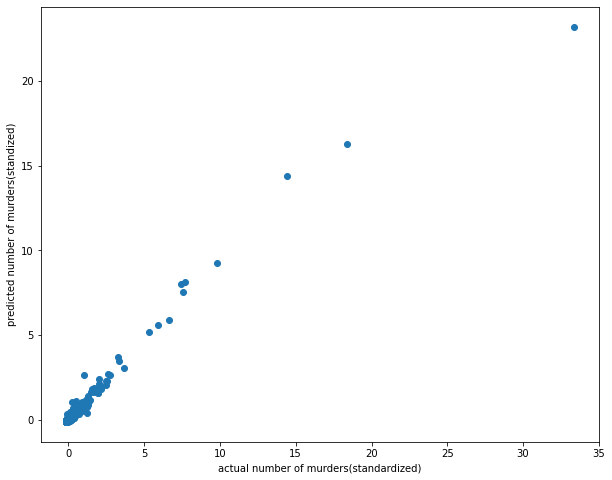

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y,y_pred)
plt.xlabel("actual number of murders(standardized)")
plt.ylabel("predicted number of murders(standized)")
plt.show

The scatter plot shows a linear line with a slope of approximately 1. That is a sign of a good regression model. It means the predicted values increased at the same pace as the actual values. 

Let's compute the R-squared. R-squared tells the proportion of varaitons in the target variable that can be explained by the variations in the predictor variables.

In [37]:
from sklearn.metrics import r2_score
print("The R-squared of the model is: ",r2_score(y,y_pred))

The R-squared of the model is:  0.9450931160884068


Using the 15 features selected, R-squared of the neural network regression model is 0.9451. That is a very good model that predicts the number of murders.

These are the features used: 	Feature_55	Feature_33	Feature_6	Feature_77	Feature_16	Feature_9	Feature_97	Feature_50	Feature_56	Feature_49	Feature_52	Feature_46	Feature_8	Feature_74	Feature_51

What are those features? These dataset is a very messy dataset. A lot of cleaning has to be done. The original dataset has no column labels. "Feature_1", "Feature_2", ... are column labels I put in for reference convenicence. 

This is the discriptions of the columns on UCI's website. https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized scroll down to where it says ".arff header for weka:"

I copied the list and pasted on Excel. For the purpose here. It is a lot more convenient to do it on Excel. (I don't want mmy Excel skills to decay. :) I spent almost $800 to get certified as an Expert for Microsoft Office 2016. Don't want that investment to be wasted. :) )

Following is a screenshot of how it looks like in Excel.

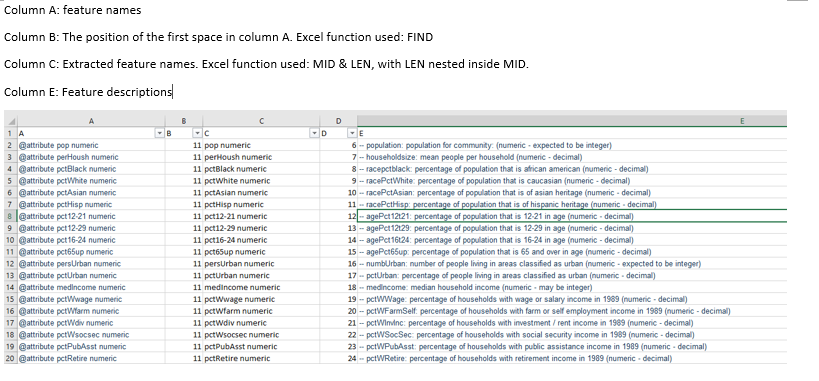

In [18]:
from IPython.display import Image
Image("1.png")

The features start at "6", because we removed the first five features.

The neural network regression model used these features: Feature_55 Feature_33 Feature_6 Feature_77 Feature_16 Feature_9 Feature_97 Feature_50 Feature_56 Feature_49 Feature_52 Feature_46 Feature_8 Feature_74 Feature_51

This is what they are:

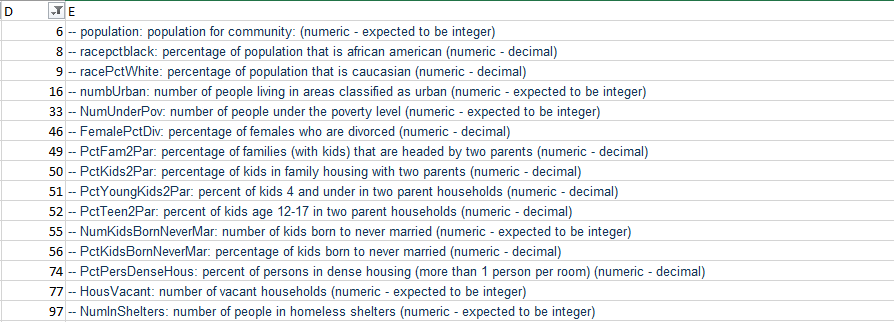

In [19]:
Image("2.png")

Our neural network regression model has an R-squared of 0.9451. That means the features above explain 94.51% of the change in the number of murder cases in the communities covered by the dataset.

The biggest challenge with this dataset is that it is VERY messy. A lot of data cleaning needs to be done before we can actually start building the model. For this task, I spent about 90% of the time cleaning the data and preparing it. The actual time I spent building the model consumed only 10% of the time, partly because I had built a neural network regression model before. I could just recycle the code, with a little tweaking to make it work for this dataset.

This is a very good model. **However, it must be pointed out that, we can use the features above to predict the number of murders in the communities, it does NOT mean that these features directly caused murders to happen. It merely means that we can use them to predict the number of murders.**